模拟三率一面的取值范围

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
D:\installation\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


sigma原则：数值分布在（μ-σ，μ+σ）中的概率为0.6526

2sigma原则：数值分布在（μ-2σ，μ+2σ）中的概率为0.9544

3sigma原则：数值分布在（μ-3σ，μ+3σ）中的概率为0.9974

(array([  1.,   2.,   5.,   3.,  16.,  33.,  38.,  70.,  97., 121., 126.,
        143., 103.,  96.,  66.,  37.,  24.,   9.,   7.,   3.]),
 array([-12.25994043, -10.6649691 ,  -9.06999777,  -7.47502644,
         -5.88005511,  -4.28508378,  -2.69011245,  -1.09514112,
          0.49983021,   2.09480154,   3.68977287,   5.2847442 ,
          6.87971553,   8.47468686,  10.06965819,  11.66462952,
         13.25960085,  14.85457217,  16.4495435 ,  18.04451483,
         19.63948616]),
 <a list of 20 Patch objects>)

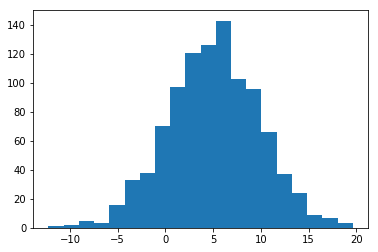

In [25]:
mu = 5
sigma = 5
xq = sigma*np.random.randn(1000)+mu # 需求量

plt.hist(xq, bins=20)

In [6]:
slym = pd.read_excel('D:\jupyter_dir\yancao\SmartPut\data\step2-ANSI-new.xlsx')
slym.head()

,Unnamed: 0,品规ID,档位,订足面,订足率,订单满足率,订购率,上期策略,总户数,订购量,需求量,投放量,订足户数,订购户数,品规名
0,0,6901028010290,二十九档,0.500000,0.00303,0.500000,0.009091,2.0,660.0,4.0,8.0,1320,3.0,6,中南海(京韵细支烤烟)
1,1,6901028010290,二十七档,0.142857,NaN,0.222222,0.020349,0.0,344.0,2.0,9.0,0,1.0,7,中南海(京韵细支烤烟)
2,2,6901028010290,二十档,0.000000,NaN,0.000000,0.002648,0.0,1133.0,0.0,3.0,0,0.0,3,中南海(京韵细支烤烟)
3,3,6901028010290,二十八档,0.000000,0.00000,0.000000,0.009202,1.0,326.0,0.0,3.0,326,0.0,3,中南海(京韵细支烤烟)
4,4,6901028010290,十四档,0.000000,NaN,0.000000,0.000934,0.0,1071.0,0.0,13.0,0,0.0,1,中南海(京韵细支烤烟)


In [20]:
choice = ['凤凰(细支)','云烟(软珍品)','苏烟(五星红杉树)','南京(十二钗烤烟)','南京(雨花石)','苏烟(软金砂)','泰山(平安)','泰山(新品)','黄鹤楼(硬金砂龙烟)','玉溪(软)']
dt = slym[slym['品规名'].map(lambda x: x in choice)]

name_list = ['三十档', '二十九档', '二十八档', '二十七档', '二十六档','二十五档','二十四档','二十三档','二十二档','二十一档',
          '二十档','十九档','十八档','十七档','十六档','十五档','十四档', '十三档','十二档','十一档', '十档','九档',
          '八档','七档','六档', '五档','四档','三档','二档','一档']

t = 30
for i in name_list: 
    dt['档位'] = dt['档位'].replace(i,t)
    t -= 1

dt.sort_values(by=['品规ID','档位'],inplace=True,ascending=[True,False])
dt.to_excel('D:\jupyter_dir\yancao\SmartPut\data\手动调整.xlsx')

In [26]:
dt.head()

,Unnamed: 0,品规ID,档位,订足面,订足率,订单满足率,订购率,上期策略,总户数,订购量,需求量,投放量,订足户数,订购户数,品规名
43,43,6901028018166,30,0.880000,0.060041,0.913580,0.101420,5.0,493.0,148.0,162.0,2465,44.0,50,凤凰(细支)
34,34,6901028018166,29,0.846154,0.036364,0.716418,0.059091,4.0,660.0,96.0,134.0,2640,33.0,39,凤凰(细支)
32,32,6901028018166,28,0.851852,0.048057,0.691176,0.082822,3.0,326.0,47.0,68.0,978,23.0,27,凤凰(细支)
37,37,6901028018166,27,0.958333,0.059593,0.836735,0.069767,2.0,344.0,41.0,49.0,688,23.0,24,凤凰(细支)
38,38,6901028018166,26,0.868421,0.038806,0.764706,0.056716,2.0,670.0,52.0,68.0,1340,33.0,38,凤凰(细支)


In [50]:
dt['上期策略'].fillna(0, inplace=True)
pg = dt['品规名'].value_counts()
stra = pd.DataFrame(index=pg.index, columns=range(30,0,-1))

for i in range(stra.shape[0]):
    tf = dt[dt['品规名']==stra.index[i]]['上期策略'].values
    stra.iloc[i,:] = tf

stra.to_excel('D:\jupyter_dir\yancao\SmartPut\data\手动调整1.xlsx')